# **Samples in datasets that do not contain all features**

In [36]:
import pandas as pd
import numpy as np

In [37]:
users = pd.read_csv('ml1m/content/dataset/users.dat', sep='::',
                    engine='python',
                    names=['userid', 'gender', 'age', 'occupation', 'zip'])
users.head()

,userid,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [38]:
ratings = pd.read_csv('ml1m/content/dataset/ratings.dat', engine='python',
                      sep='::', names=['userid', 'movieid', 'rating', 'timestamp'])
ratings.head()

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [39]:
movies_train = pd.read_csv('ml1m/content/dataset/movies_train.dat', engine='python',
                     sep='::', names=['movieid', 'title', 'genre'], 
                     encoding='latin-1', index_col=False)
movies_train['genre'] = movies_train['genre'].apply(lambda x: x.split('|'))
movies_train['year'] = movies_train['title'].apply(lambda x: x[-5:-1])
movies_train['title'] = movies_train['title'].apply(lambda x: x[:-7])
movies_train.head()

,movieid,title,genre,year
0,1650,Washington Square,[Drama],1997
1,185,"Net, The","[Sci-Fi, Thriller]",1995
2,1377,Batman Returns,"[Action, Adventure, Comedy, Crime]",1992
3,3204,"Boys from Brazil, The",[Thriller],1978
4,1901,Dear Jesse,[Documentary],1997


In [40]:
movies_test = pd.read_csv('ml1m/content/dataset/movies_test.dat', engine='python',
                        sep='::', names=['movieid', 'title', 'genre'], 
                        encoding='latin-1', index_col=False)
movies_test['genre'] = movies_test['genre'].apply(lambda x: x.split('|'))
movies_test['year'] = movies_test['title'].apply(lambda x: x[-5:-1])
movies_test['title'] = movies_test['title'].apply(lambda x: x[:-7])
movies_test.head()

,movieid,title,genre,year
0,3397,"Great Muppet Caper, The","[Children's, Comedy]",1981
1,2067,Doctor Zhivago,"[Drama, Romance, War]",1965
2,2651,Frankenstein Meets the Wolf Man,[Horror],1943
3,2989,For Your Eyes Only,[Action],1981
4,3415,"Mirror, The (Zerkalo)",[Drama],1975


Movies overlap between splits

In [41]:
movies_train['movieid'].isin(movies_test['movieid']).sum()

0

Movies that don't have any ratings

In [42]:
# train_no_posters = movies_train[~movies_train['movieid'].isin(ratings['movieid'])]
# len(train_no_posters), len(train_no_posters) / len(movies_train)

movies_train['has_rating'] = movies_train['movieid'].isin(ratings['movieid'])
movies_train[movies_train['has_rating'] == False].count()

movieid       143
title         143
genre         143
year          143
has_rating    143
dtype: int64

In [ ]:
143 

In [43]:
# test_no_posters = movies_test[~movies_test['movieid'].isin(ratings['movieid'])]
# len(test_no_posters), len(test_no_posters) / len(movies_test)

movies_test['has_rating'] = movies_test['movieid'].isin(ratings['movieid'])
movies_test[movies_test['has_rating'] == False].count()

movieid       34
title         34
genre         34
year          34
has_rating    34
dtype: int64

Movies that don't have poster images

In [44]:
def has_poster(movieid):
    try:
        with open('./ml1m/content/dataset/ml1m-images/{}.jpg'.format(movieid), 'rb') as f:
            return True
    except FileNotFoundError:
        return False

In [45]:
movies_train['has_poster'] = movies_train['movieid'].apply(has_poster)

movies_train[movies_train['has_poster'] == False].count()

movieid       504
title         504
genre         504
year          504
has_rating    504
has_poster    504
dtype: int64

In [46]:
504 / len(movies_train)

0.1622665808113329

In [47]:
movies_test['has_poster'] = movies_test['movieid'].apply(has_poster)

movies_test[movies_test['has_poster'] == False].count()

movieid       123
title         123
genre         123
year          123
has_rating    123
has_poster    123
dtype: int64

In [48]:
123 / len(movies_test)

0.1583011583011583

Movies that don't have both ratings and poster images

In [49]:
movies_train[(movies_train['has_poster'] == False) & (movies_train['has_rating'] == False)].count()

movieid       143
title         143
genre         143
year          143
has_rating    143
has_poster    143
dtype: int64

In [50]:
movies_test[(movies_test['has_poster'] == False) & (movies_test['has_rating'] == False)].count()

movieid       34
title         34
genre         34
year          34
has_rating    34
has_poster    34
dtype: int64

Movies without ratings have no poster images

## Analysis on samples that have missing features

In [53]:
missing_trains = movies_train[movies_train['has_poster'] == False].sort_values('movieid').reset_index(drop=True)
missing_trains

,movieid,title,genre,year,has_rating,has_poster
0,33,Wings of Courage,"[Adventure, Romance]",1995,True,False
1,37,Across the Sea of Time,[Documentary],1995,True,False
2,51,Guardian Angel,"[Action, Drama, Thriller]",1994,False,False
3,53,Lamerica,[Drama],1994,True,False
4,56,Kids of the Round Table,"[Adventure, Children's, Fantasy]",1995,True,False
...,...,...,...,...,...,...
499,3890,Back Stage,[Documentary],2000,True,False
500,3891,Turn It Up,"[Crime, Drama]",2000,True,False
501,3899,Circus,[Comedy],2000,True,False
502,3905,"Specials, The",[Comedy],2000,True,False


<Axes: xlabel='genre'>

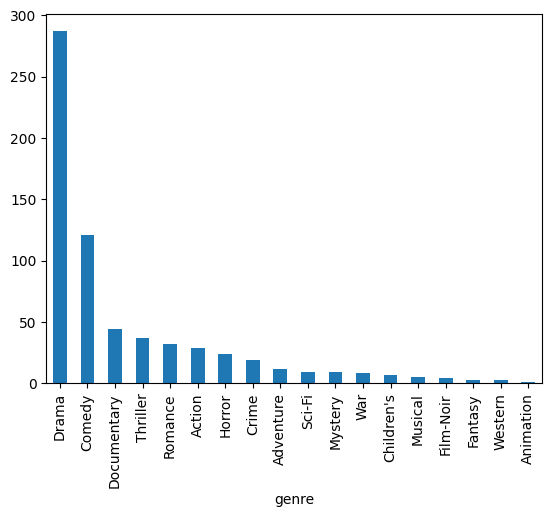

In [73]:
missing_trains.explode('genre')
missing_trains_by_genre = missing_trains.explode('genre').groupby('genre').size().sort_values(ascending=False)
missing_trains_by_genre.plot.bar()

In [74]:
missing_trains_by_genre = missing_trains_by_genre.to_frame(name='count')
missing_trains_by_genre = missing_trains_by_genre.sort_index()
missing_trains_by_genre

,count
genre,
Action,29
Adventure,12
Animation,1
Children's,7
Comedy,121
Crime,19
Documentary,44
Drama,287
Fantasy,3


In [ ]:
genres_counts = movies_train.explode('genre').groupby('genre').size().to_frame(name='count')
genres_counts = genres_counts.sort_index()

In [77]:
missing_trains_by_genre['total'] = genres_counts['count']
missing_trains_by_genre['missing_ratio'] = missing_trains_by_genre['count'] / genres_counts['count']
missing_trains_by_genre

,count,missing_ratio,total
genre,,,
Action,29,0.070218,413
Adventure,12,0.051064,235
Animation,1,0.011905,84
Children's,7,0.034483,203
Comedy,121,0.126967,953
Crime,19,0.105556,180
Documentary,44,0.453608,97
Drama,287,0.221793,1294
Fantasy,3,0.049180,61


In [78]:
missing_trains_by_genre.sort_values('missing_ratio', ascending=False)

,count,missing_ratio,total
genre,,,
Documentary,44,0.453608,97
Drama,287,0.221793,1294
Comedy,121,0.126967,953
Crime,19,0.105556,180
Film-Noir,4,0.105263,38
Mystery,9,0.102273,88
Thriller,37,0.095855,386
Horror,24,0.089552,268
Romance,32,0.084881,377


<Axes: xlabel='year'>

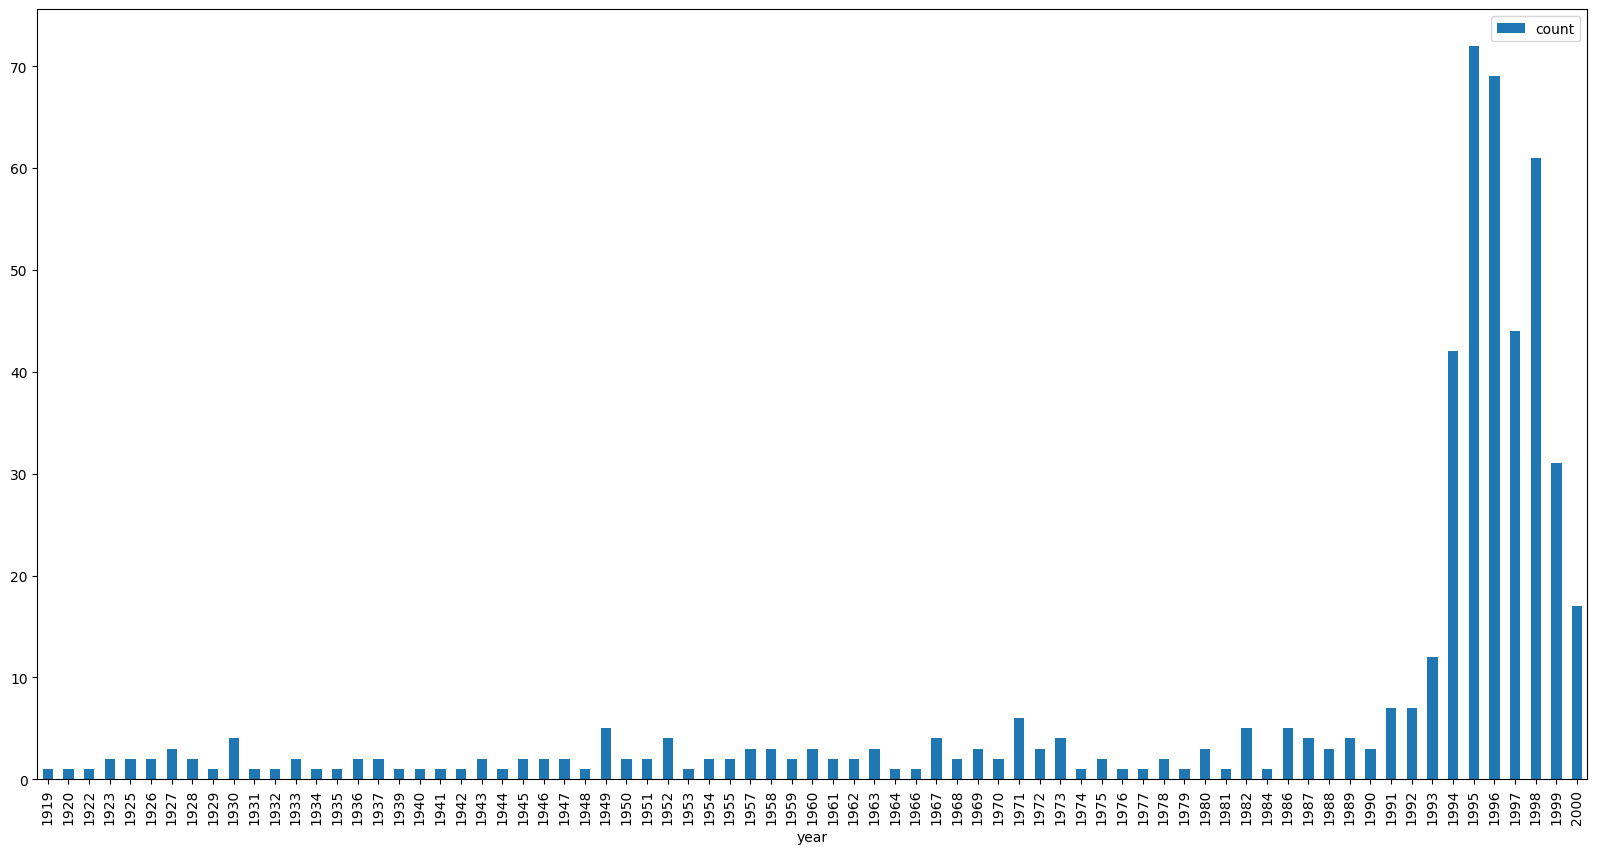

In [60]:
missing_trains_by_year = missing_trains.groupby('year').size().reset_index(name='count')
missing_trains_by_year.plot.bar(x='year', y='count', figsize=(20, 10))

In [79]:
missing_trains_by_year['total'] = movies_train.groupby('year').size().reset_index(name='count')['count']
missing_trains_by_year['missing_ratio'] = missing_trains_by_year['count'] / missing_trains_by_year['total']
missing_trains_by_year.sort_values('missing_ratio', ascending=False)

,year,count,total,missing_ratio
3,1923,2,1,2.000000
69,1995,72,52,1.384615
9,1930,4,3,1.333333
70,1996,69,62,1.112903
1,1920,1,1,1.000000
...,...,...,...,...
53,1977,1,18,0.055556
55,1979,1,18,0.055556
57,1981,1,19,0.052632
52,1976,1,21,0.047619
